In [1]:
!pip install -Uqq fastbook
!pip install DuckDuckGoImages
import DuckDuckGoImages as ddg
import fastbook
from fastbook import *
from fastai.vision.widgets import *

In [22]:
food_types = 'Fesenjoon','Ash Reshteh','Zereshk polo', 'Ghormeh sabzi', 'Mirza Ghasem', 'Gheimeh', 'Khoresh bademjan', 'Tahchin', 'Baghali polo', 'Kashke bademjan', 'Joojeh Kabab'
path = Path('foods')
for o in food_types:
    ims = ddg.download(f'{o} food', folder=f'./foods/{o}', max_urls=100)
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink);

In [66]:
path = Path('foods')
foods = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [67]:
foods = foods.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = foods.dataloaders(path)
#dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [68]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(15)

epoch,train_loss,valid_loss,error_rate,time
0,3.376407,1.846213,0.549839,00:13


epoch,train_loss,valid_loss,error_rate,time
0,2.397511,1.534608,0.479100,00:13
1,2.260471,1.271254,0.414791,00:13
2,1.992948,1.004706,0.311897,00:14
3,1.745101,0.850587,0.247588,00:13
4,1.502223,0.738567,0.209003,00:14
5,1.283186,0.657279,0.173633,00:13
6,1.128196,0.562288,0.144695,00:13
7,0.967489,0.562859,0.157556,00:14
8,0.840993,0.537165,0.154341,00:13
9,0.737595,0.536680,0.141479,00:14


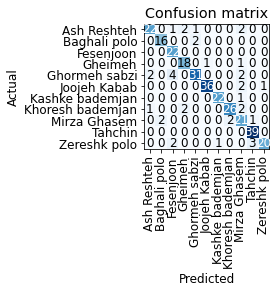

In [69]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

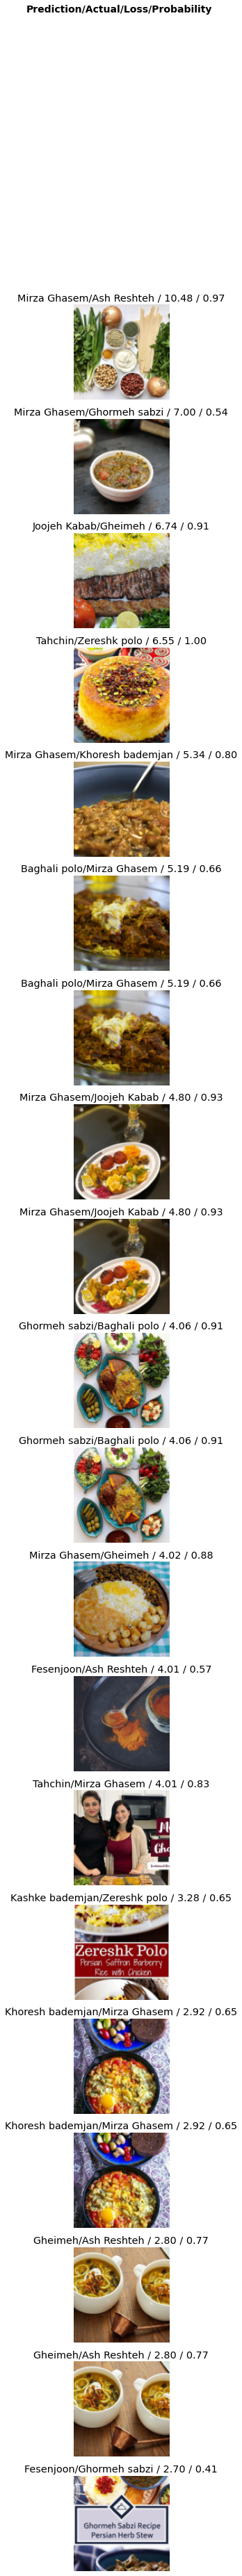

In [70]:
interp.plot_top_losses(20, nrows=20)

In [51]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [65]:
for idx in cleaner.delete(): 
    cleaner.fns[idx].unlink()
for idx,cat in cleaner.change():
    shutil.move(str(cleaner.fns[idx]), path/cat)

FileNotFoundError: [Errno 2] No such file or directory: 'foods/Zereshk polo/4a7a6260e6c14aeaa935603d61e71553.jpg'

In [72]:
food=learn.export()